### Driven Data Pump it Up Challenge:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

In [104]:
df.shape

(59400, 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [7]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
#df[['funder','installer']].dropna().head(10)

In [74]:
df.status_group.count()

59400

In [65]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [84]:
functional_percent = (sum(df['status_group'] == 'functional') / df.status_group.count()) * 100
non_functional_percent = (sum(df['status_group'] == 'non functional') / df.status_group.count()) * 100
repair_percent = (sum(df['status_group'] == 'functional needs repair') / df.status_group.count()) * 100
print('Functional Pumps are: ' + str(round(functional_percent, 2)) + '%')
print('Non Functional Pumps are: ' + str(round(non_functional_percent, 2)) + '%')
print('Functional but Needs Repair Pumps are: ' + str(round(repair_percent, 2)) + '%')

Functional Pumps are: 54.31%
Non Functional Pumps are: 38.42%
Functional but Needs Repair Pumps are: 7.27%


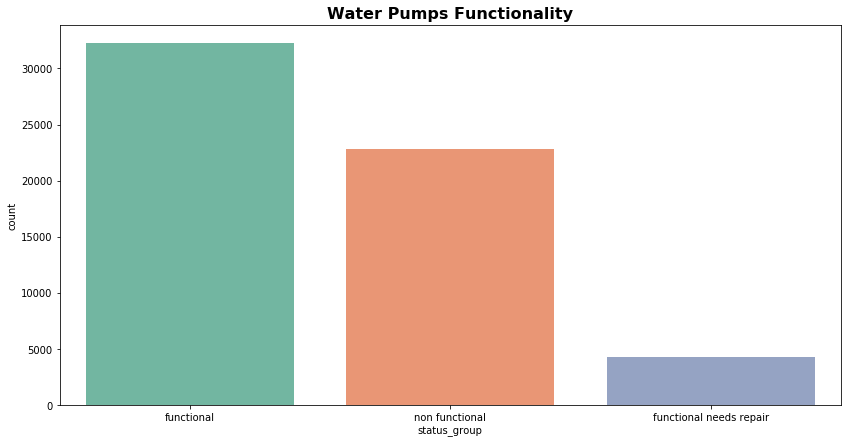

In [99]:
plt.figure(figsize=(14,7))
plt.title("Water Pumps Functionality",fontsize=16, fontweight='bold')
sns.countplot(x=df['status_group'], data=df, palette="Set2");

#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional one.

In [102]:
piv_df= df[['basin','status_group','construction_year']]
piv_table = piv_df.pivot_table(index='basin',
                           columns='status_group', aggfunc='count')
piv_table

construction_year                          \
status_group                   functional functional needs repair   
basin                                                               
Internal                             4482                     557   
Lake Nyasa                           3324                     250   
Lake Rukwa                           1000                     270   
Lake Tanganyika                      3107                     742   
Lake Victoria                        5100                     989   
Pangani                              5372                     477   
Rufiji                               5068                     437   
Ruvuma / Southern Coast              1670                     326   
Wami / Ruvu                          3136                     269   

                                        
status_group            non functional  
basin                                   
Internal                          2746  
Lake Nyasa                        1511  
Lake Rukwa                        1184  
Lake Tanganyika                   2583  
Lake Victoria                     4159  
Pangani                           3091  
Rufiji                            2471  
Ruvuma / Southern Coast           2497  
Wami / Ruvu                       2582

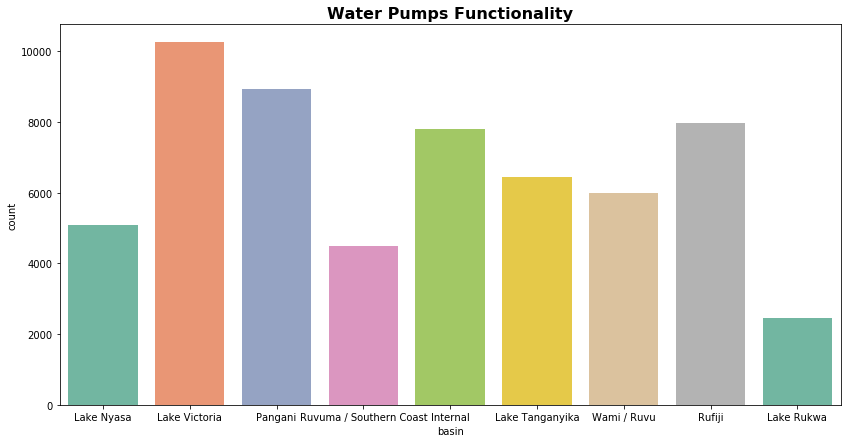

In [115]:
plt.figure(figsize=(14,7))
plt.title("Water Pumps Functionality",fontsize=16, fontweight='bold')
sns.countplot(x=df['basin'], data=df, palette="Set2");

In [103]:
piv_df= df[['water_quality','status_group','basin']]
piv_table = piv_df.pivot_table(index='water_quality',
                           columns='status_group', aggfunc='count')
piv_table

basin                                       
status_group       functional functional needs repair non functional
water_quality                                                       
coloured                246.0                    54.0          190.0
fluoride                151.0                    13.0           36.0
fluoride abandoned        6.0                     NaN           11.0
milky                   438.0                    14.0          352.0
salty                  2220.0                   225.0         2411.0
salty abandoned         174.0                    72.0           93.0
soft                  28760.0                  3904.0        18154.0
unknown                 264.0                    35.0         1577.0

### Dropping The Features With Similar Representation of Data

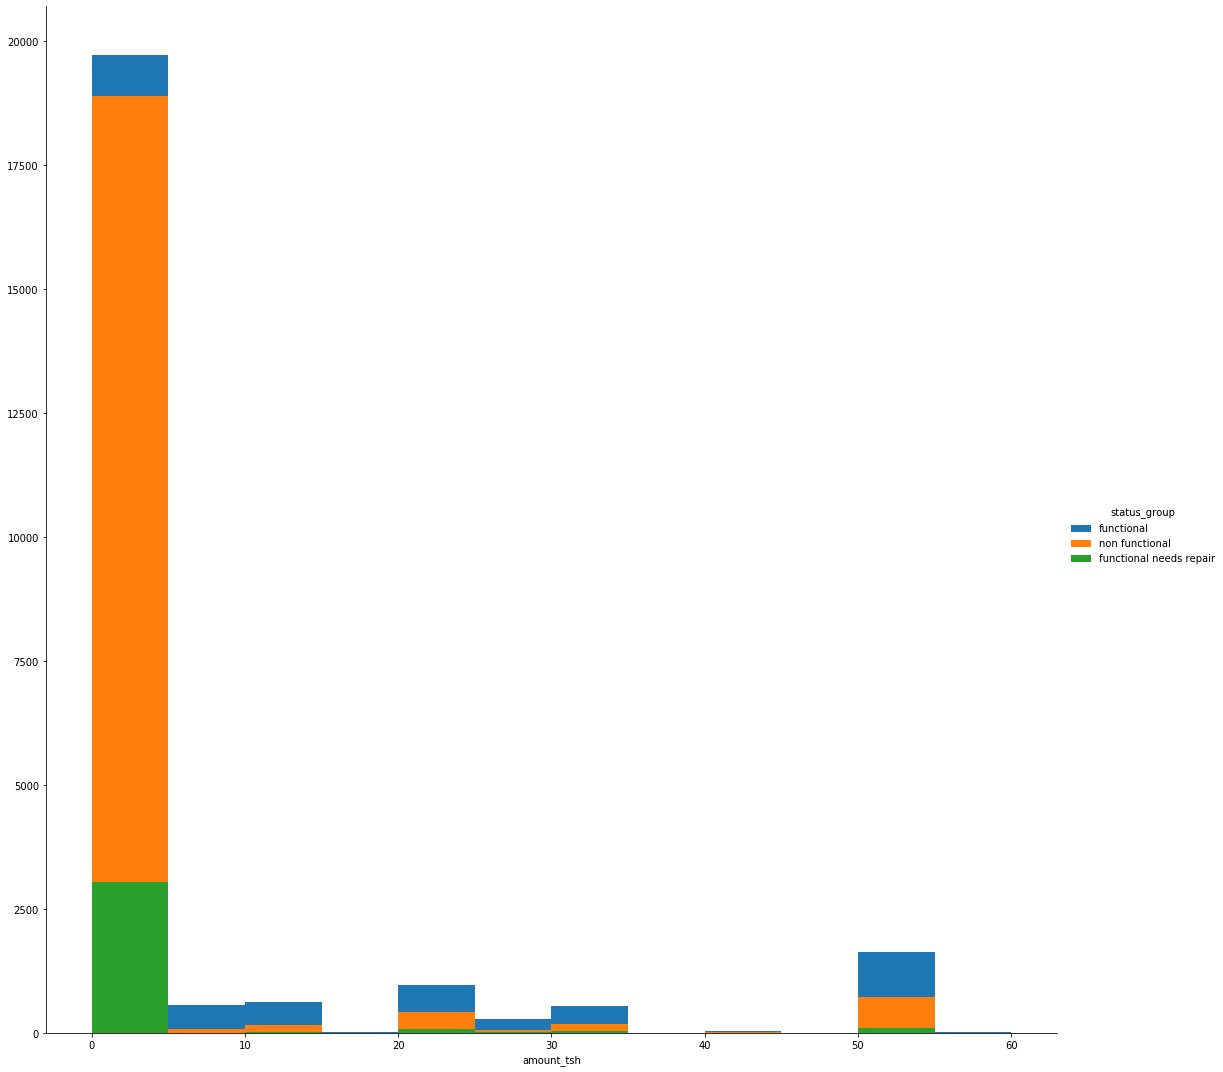

In [10]:
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(df, hue='status_group',height=15)
g = g.map(plt.hist, 'amount_tsh', bins= bins ).add_legend()

In [11]:
# checking the amount_tsh column to see how many rows have 0's in them
len(df[df['amount_tsh'] == 0])

41639

In [12]:
df[df['gps_height'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12,36957,0.0,2012-10-14,World Vision,0,World vision,33.798106,-3.290194e+00,Pamba,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333e+00,Mwabasabi,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.000000,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
27,20145,0.0,2011-07-11,Hesawa,0,DWE,31.104257,-1.735361e+00,Kwawilliam,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [13]:
df[df['gps_height'] == 0].groupby('status_group').size()

status_group
functional                 10469
functional needs repair     1763
non functional              8206
dtype: int64

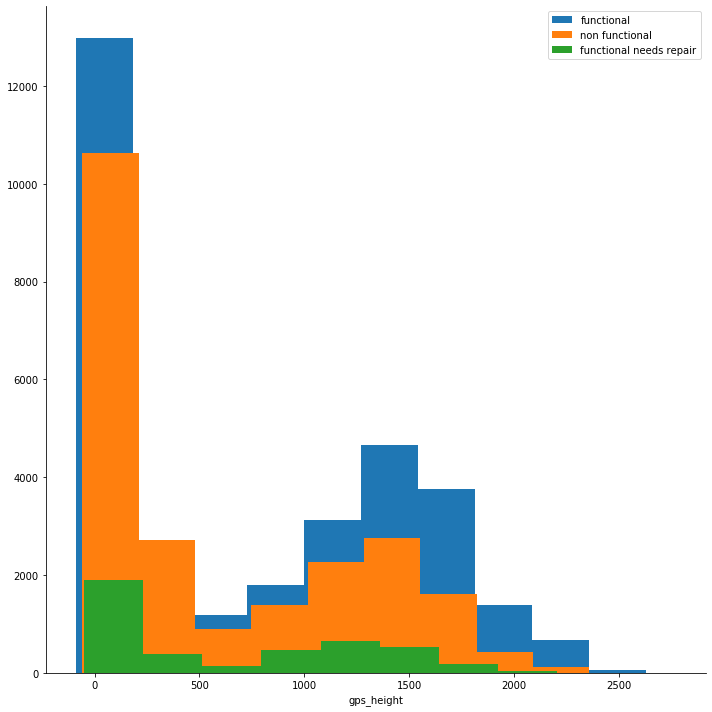

In [14]:
g = sns.FacetGrid(df, hue='status_group',height=10)
g = g.map(plt.hist, 'gps_height')
plt.legend()

In [15]:
#plt.figure()
#plt.subplot(111, projection="aitoff")
#plt.title("Aitoff")
#plt.grid(True)

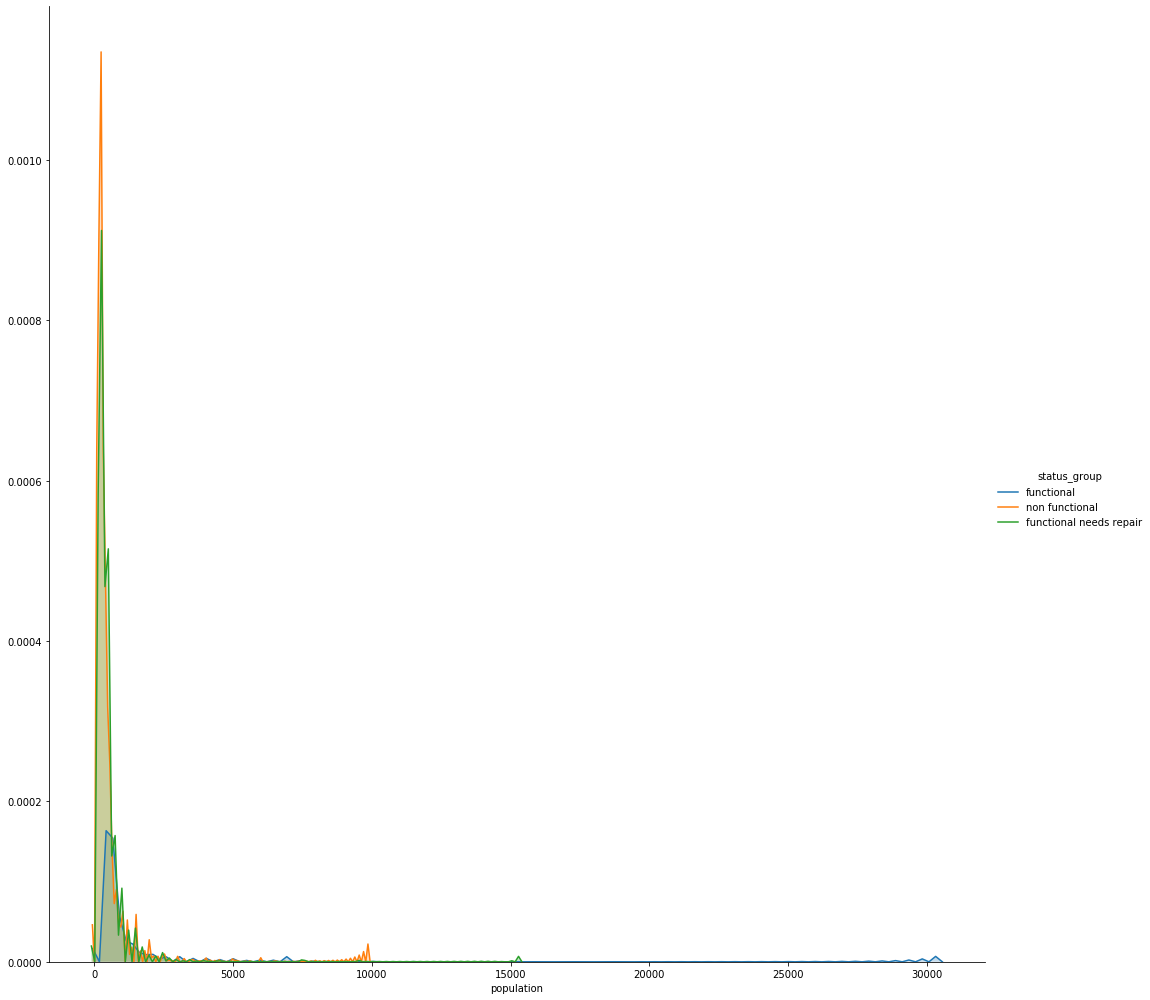

In [16]:
sns.FacetGrid(df, hue='status_group',height=14).map(sns.kdeplot, 'population', shade=True).add_legend()

In [17]:
# checking the population column to see how many rows have 0's in them
len(df[df['population'] == 0])

21381

In [18]:
# We can see that there are 41639 0's in amount_tsh column. Since these 0's might cause some 
#issues later, we need to change them to NaN values and then replace the NaN values 
#with transform("mean") and transform("median") - This is also true for population and gps_height
df.population.min()
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)

In [19]:
# checking to make sure all 0's have been changed to Null values
df.isnull().sum()

id                           0
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [20]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [21]:
df["gps_height"].fillna(df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df["gps_height"].mean(), inplace=True)
df["population"].fillna(df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
df["population"].fillna(df.groupby(['region'])["population"].transform("median"), inplace=True)
df["population"].fillna(df["population"].median(), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df["amount_tsh"].median(), inplace=True)

In [22]:
# checking to make sure all Null values have been filled
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [23]:
df.groupby(['region','permit']).size()

region         permit
Arusha         False      255
               True      2650
Dar es Salaam  False      777
Dodoma         False     1212
               True       989
Iringa         False     2117
               True      3174
Kagera         False      795
               True      2521
Kigoma         False     1160
               True      1656
Kilimanjaro    False      445
               True      3796
Lindi          False      733
               True       813
Manyara        False       77
               True      1506
Mara           False      604
               True       998
Mbeya          False     1399
               True      2134
Morogoro       False       39
               True      3967
Mtwara         False      419
               True      1311
Mwanza         False      127
               True      2975
Pwani          False     1105
               True      1530
Rukwa          False      646
               True      1162
Ruvuma         False      840
               Tru

In [24]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
df[features] = scaler.fit_transform(df[features])
df[features].head(20)

,amount_tsh,gps_height,population
0,0.342846,10.349650,0.070822
1,0.011417,10.412587,0.182957
2,0.001417,5.426573,0.163284
3,0.002846,2.468531,0.037378
4,0.014274,8.024794,0.130496
5,0.001131,5.356490,0.000000
6,0.028560,10.076795,0.327224
7,0.028560,10.076795,0.327224
8,0.014274,8.024794,0.130496
9,0.014274,8.024794,0.130496


In [25]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

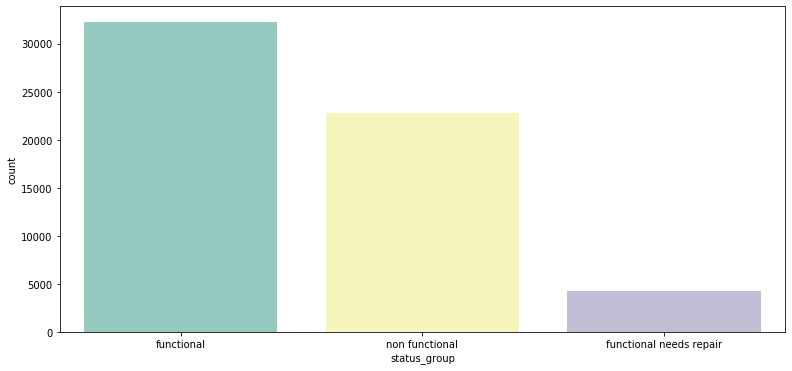

In [26]:
plt.figure(figsize=(13,6))
sns.countplot(df.status_group, palette = 'Set3')
df.status_group.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

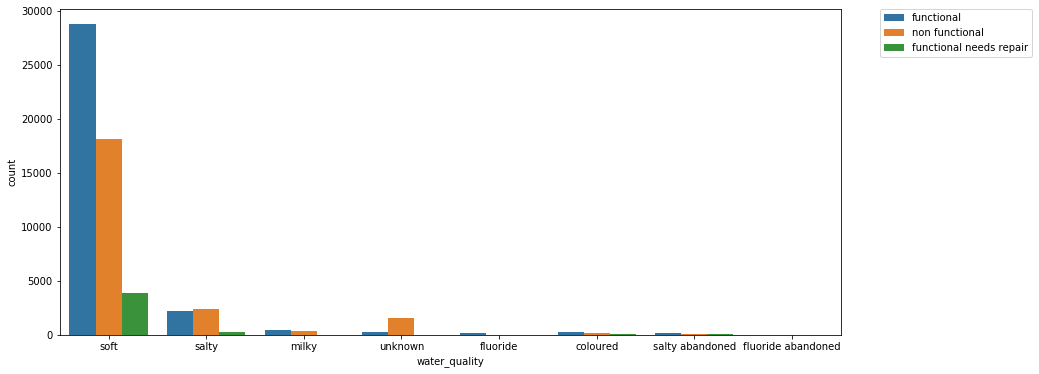

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df.water_quality.value_counts()

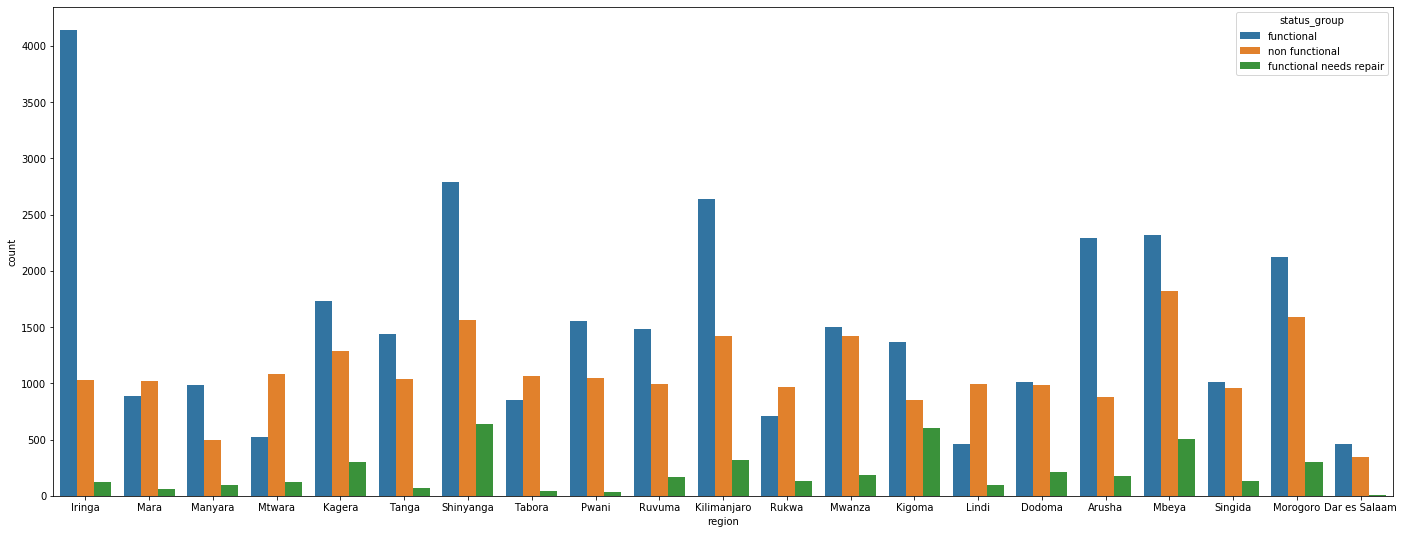

In [28]:
#looking at regions
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='region',hue='status_group')

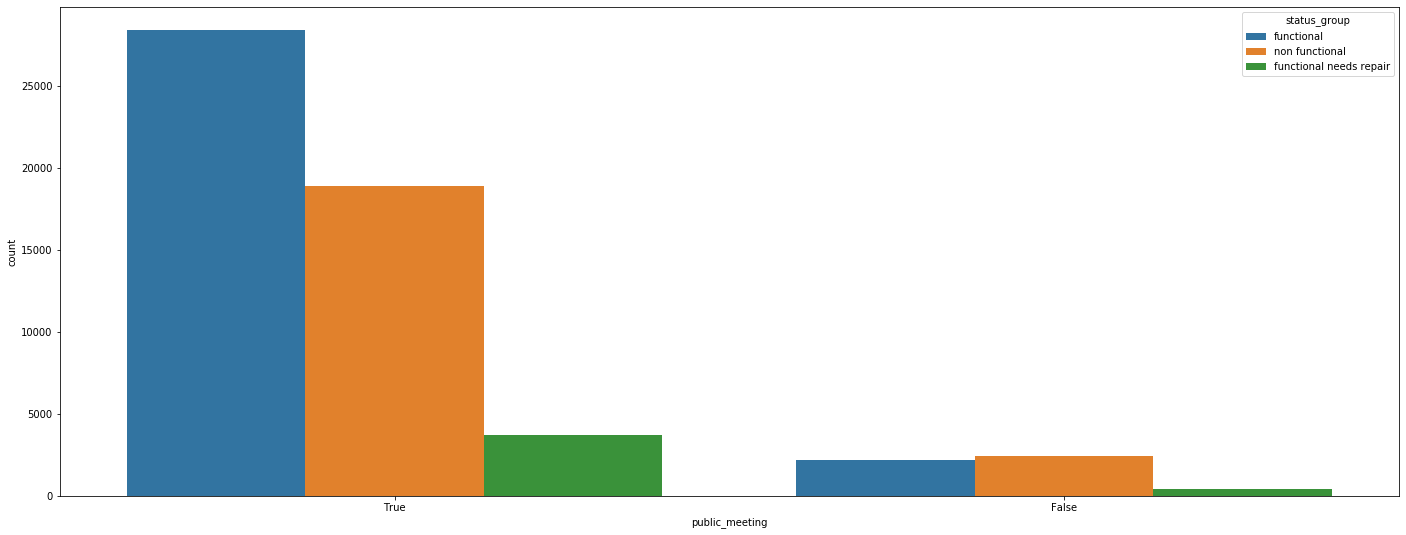

In [29]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='public_meeting',hue='status_group')

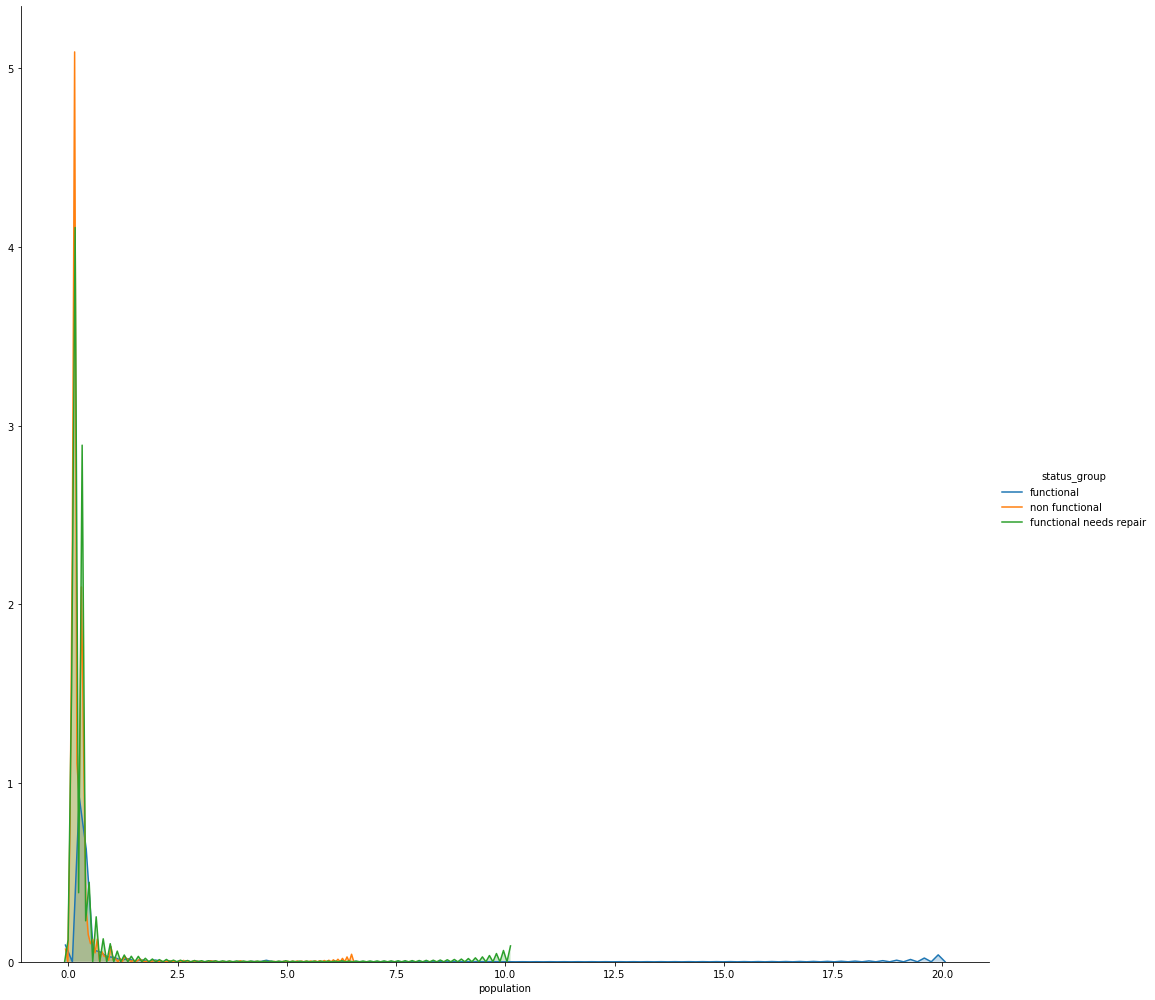

In [30]:
sns.FacetGrid(df, hue='status_group',height=14).map(sns.kdeplot, 'population', shade=True).add_legend()

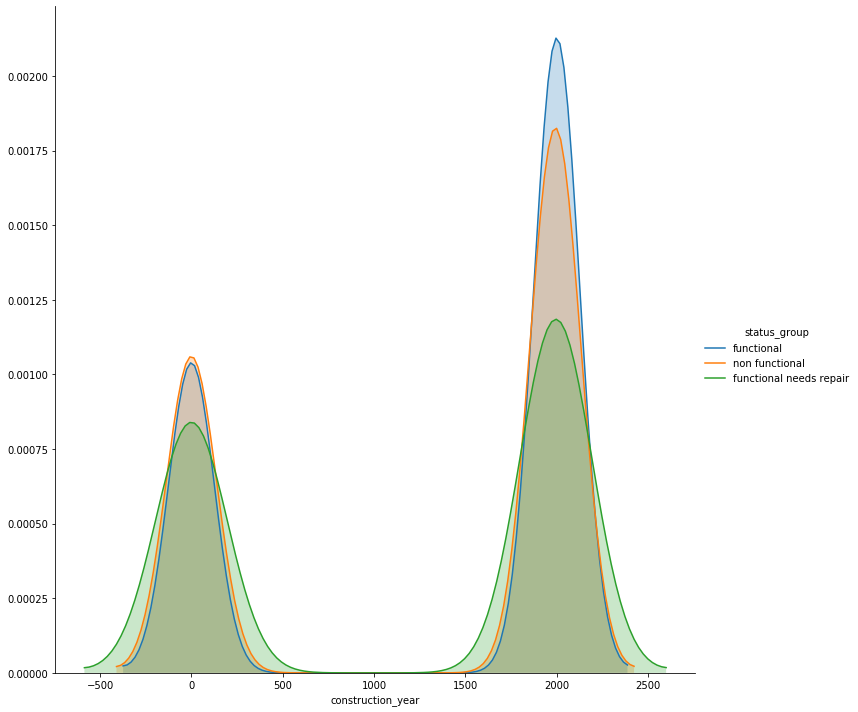

In [31]:
sns.FacetGrid(df, hue='status_group',height=10).map(sns.kdeplot, 'construction_year', shade=True).add_legend()

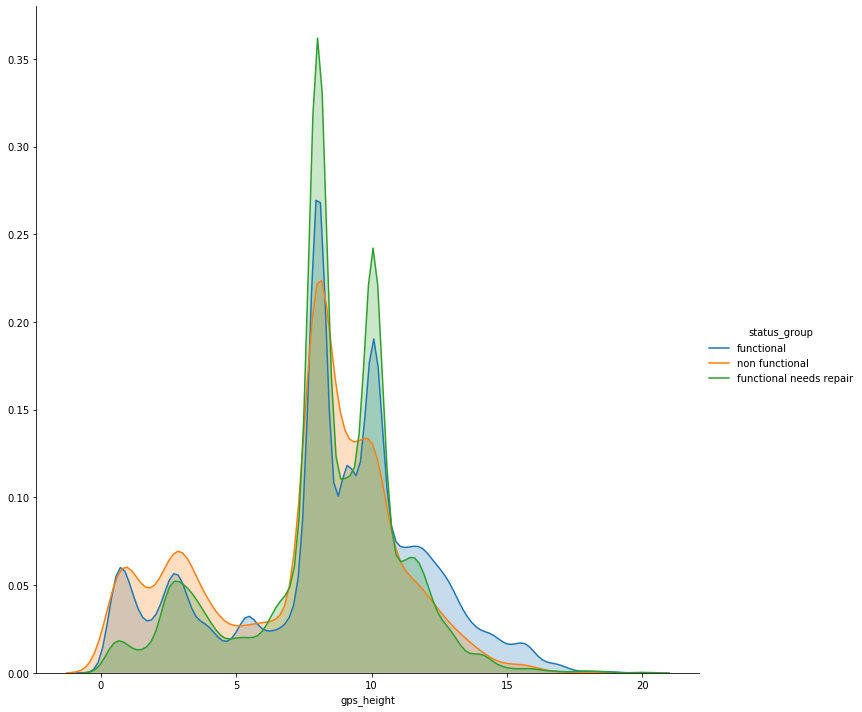

In [32]:
sns.FacetGrid(df, hue='status_group',height=10).map(sns.kdeplot, 'gps_height', shade=True).add_legend()

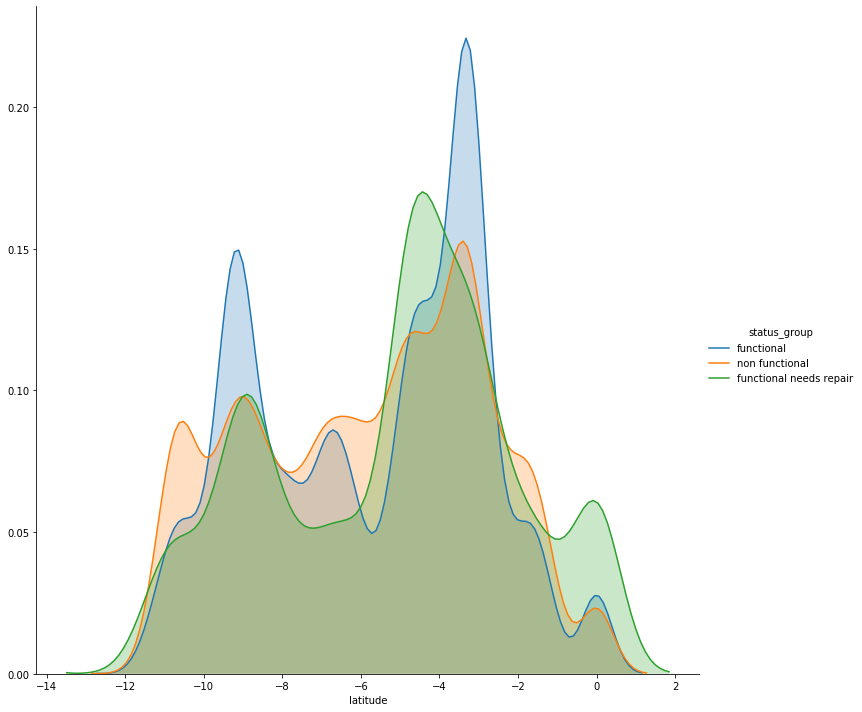

In [33]:
sns.FacetGrid(df, hue='status_group',height=10).map(sns.kdeplot, 'latitude', shade=True).add_legend()

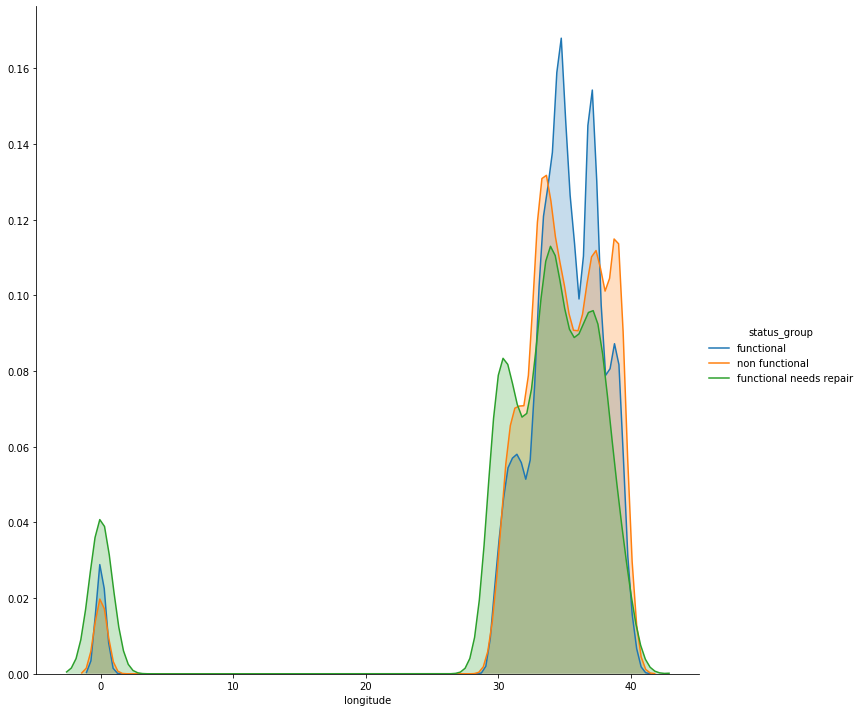

In [34]:
sns.FacetGrid(df, hue='status_group',height=10).map(sns.kdeplot, 'longitude', shade=True).add_legend()

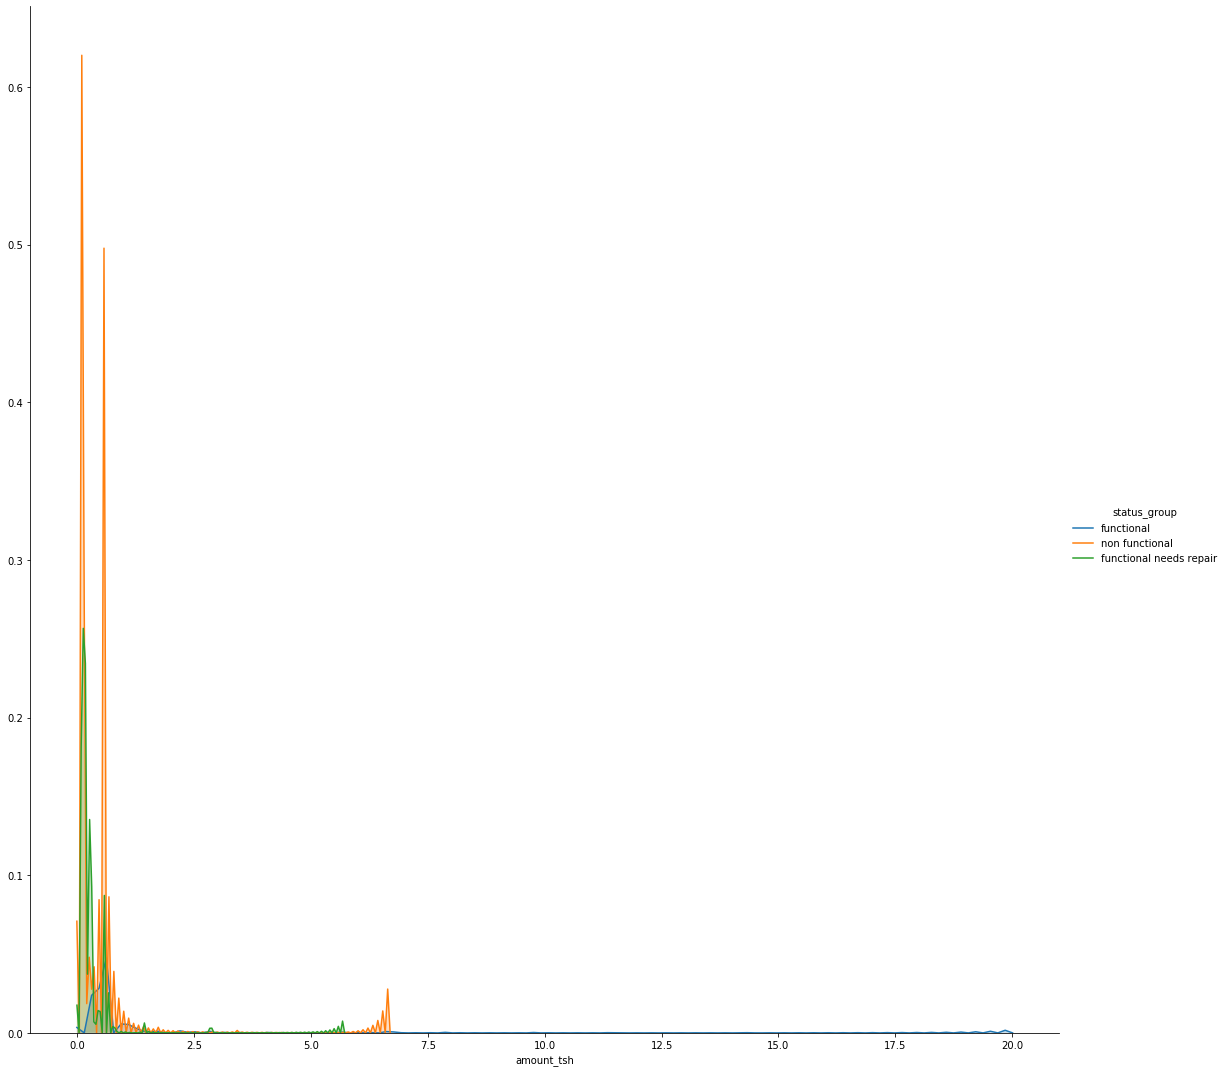

In [35]:
sns.FacetGrid(df, hue='status_group',height=15).map(sns.kdeplot, 'amount_tsh', shade=True).add_legend()

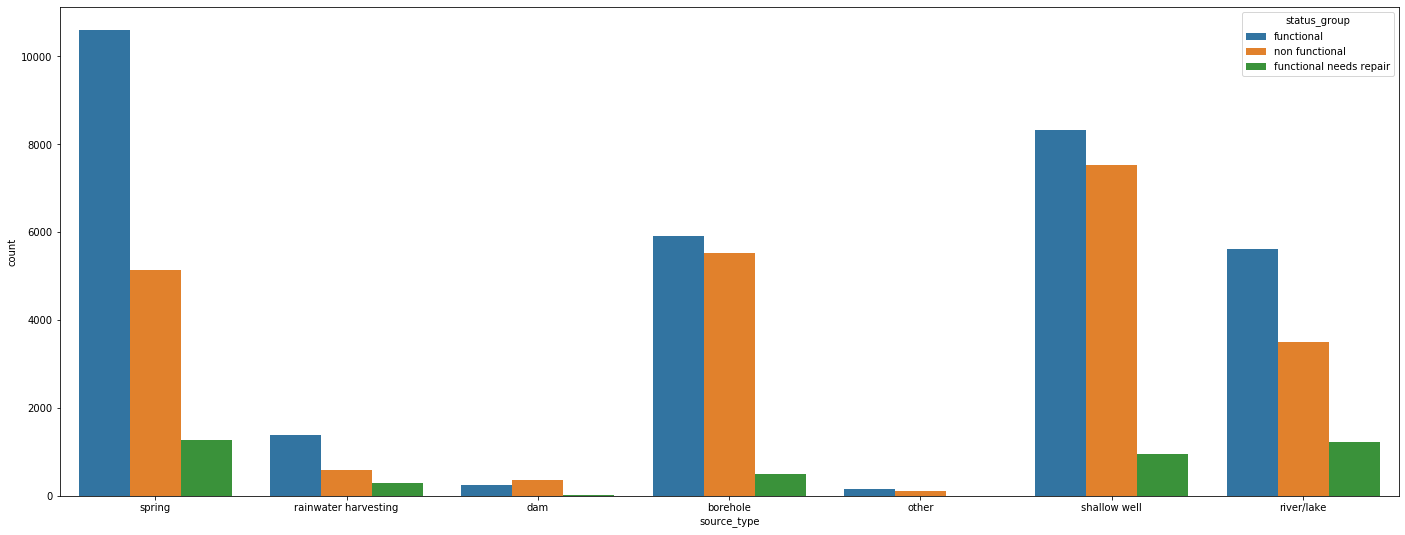

In [36]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='source_type',hue='status_group')

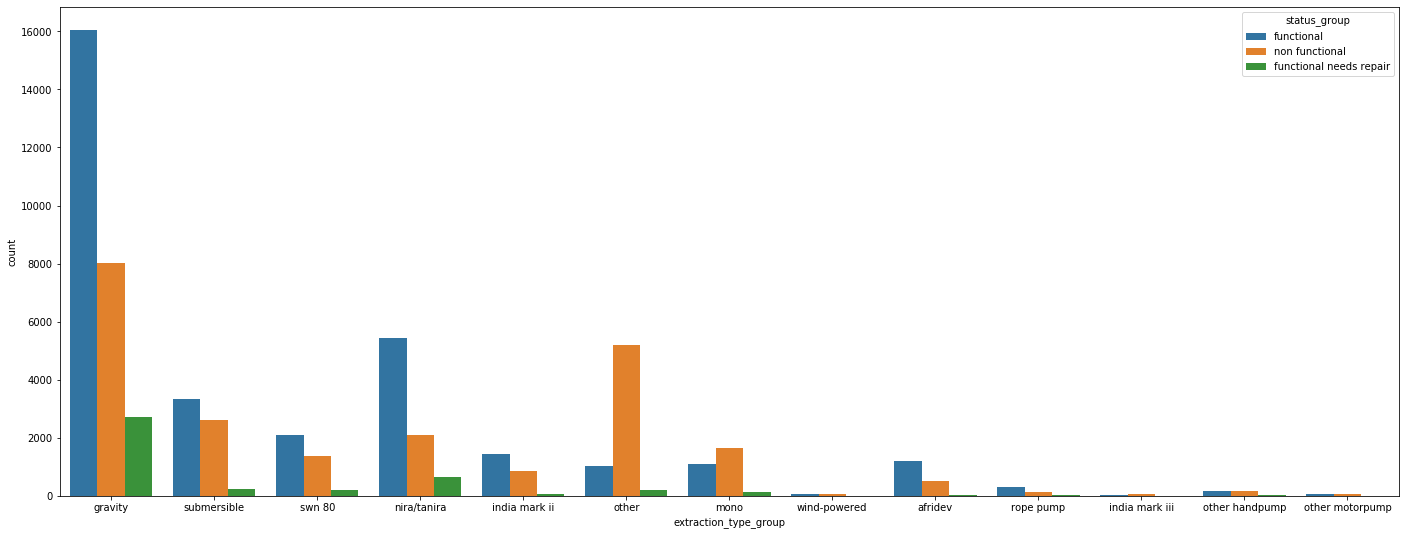

In [37]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='extraction_type_group',hue='status_group')

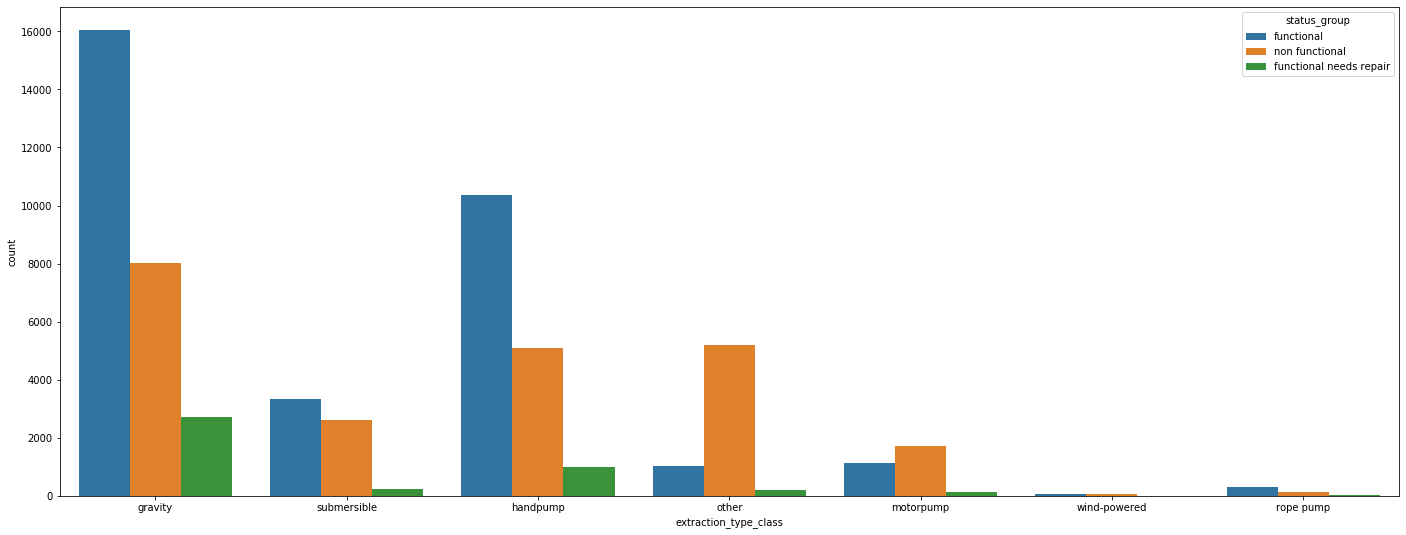

In [38]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='extraction_type_class',hue='status_group')

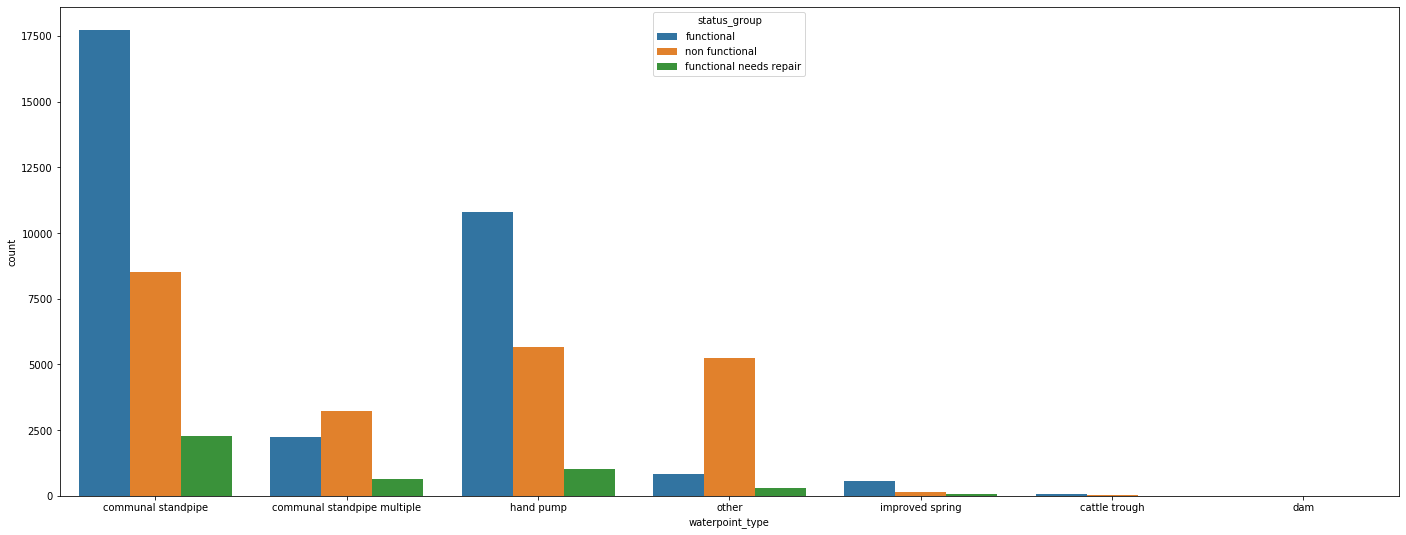

In [39]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='waterpoint_type',hue='status_group')

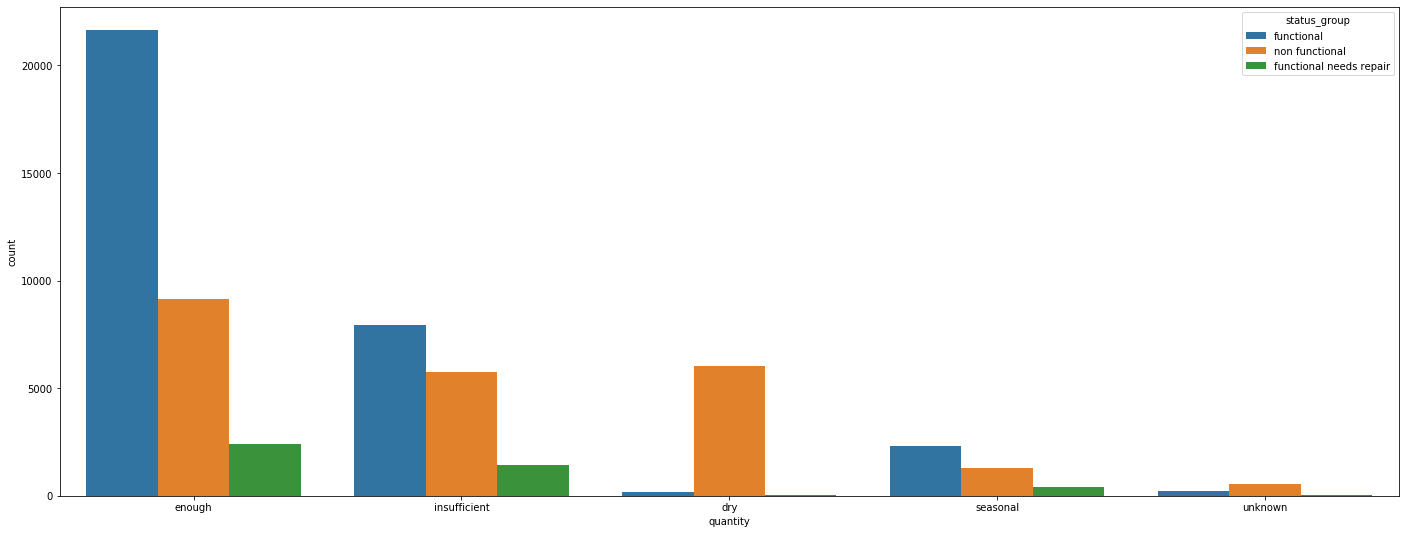

In [40]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='quantity',hue='status_group')

In [41]:
len(df[df['longitude'] == 0])

1812

In [42]:
len(df[df['latitude'] == 0])

0

In [43]:
len(df[df['construction_year'] == 0])

20709

In [44]:
df['longitude'].replace(0.0, np.nan, inplace=True)
df['latitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)

In [45]:
df.groupby(['district_code', 'region','construction_year']).size()

district_code  region         construction_year
1              Arusha         1980.0                 2
                              1990.0                23
                              2000.0               137
                              2010.0                24
               Dar es Salaam  1970.0                24
                              1990.0                 8
                              2000.0                11
                              2010.0                50
               Iringa         1964.0                 5
                              1972.0                 3
                              1974.0                 6
                              1976.0                 2
                              1978.0                13
                              1981.0                 1
                              1982.0                25
                              1983.0                44
                              1984.0                46
                 

In [46]:
df["latitude"].fillna(df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)

In [47]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [48]:
#if water point is old, it is highly likely to be non functional or needs repair.
#New features were created namely number of days and number of months water point is operational.
print(df.date_recorded.head(5))
print(df.construction_year.head(5))

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object
0    1999.0
1    2010.0
2    2009.0
3    1986.0
4    2003.0
Name: construction_year, dtype: float64


In [49]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.date_recorded.head(5)
print(df.date_recorded.dt.year.head(5))
print(df.construction_year.head(5))
df['operational_year'] = df.date_recorded.dt.year - df.construction_year
df.operational_year.head(5)

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int64
0    1999.0
1    2010.0
2    2009.0
3    1986.0
4    2003.0
Name: construction_year, dtype: float64


0    12.0
1     3.0
2     4.0
3    27.0
4     8.0
Name: operational_year, dtype: float64

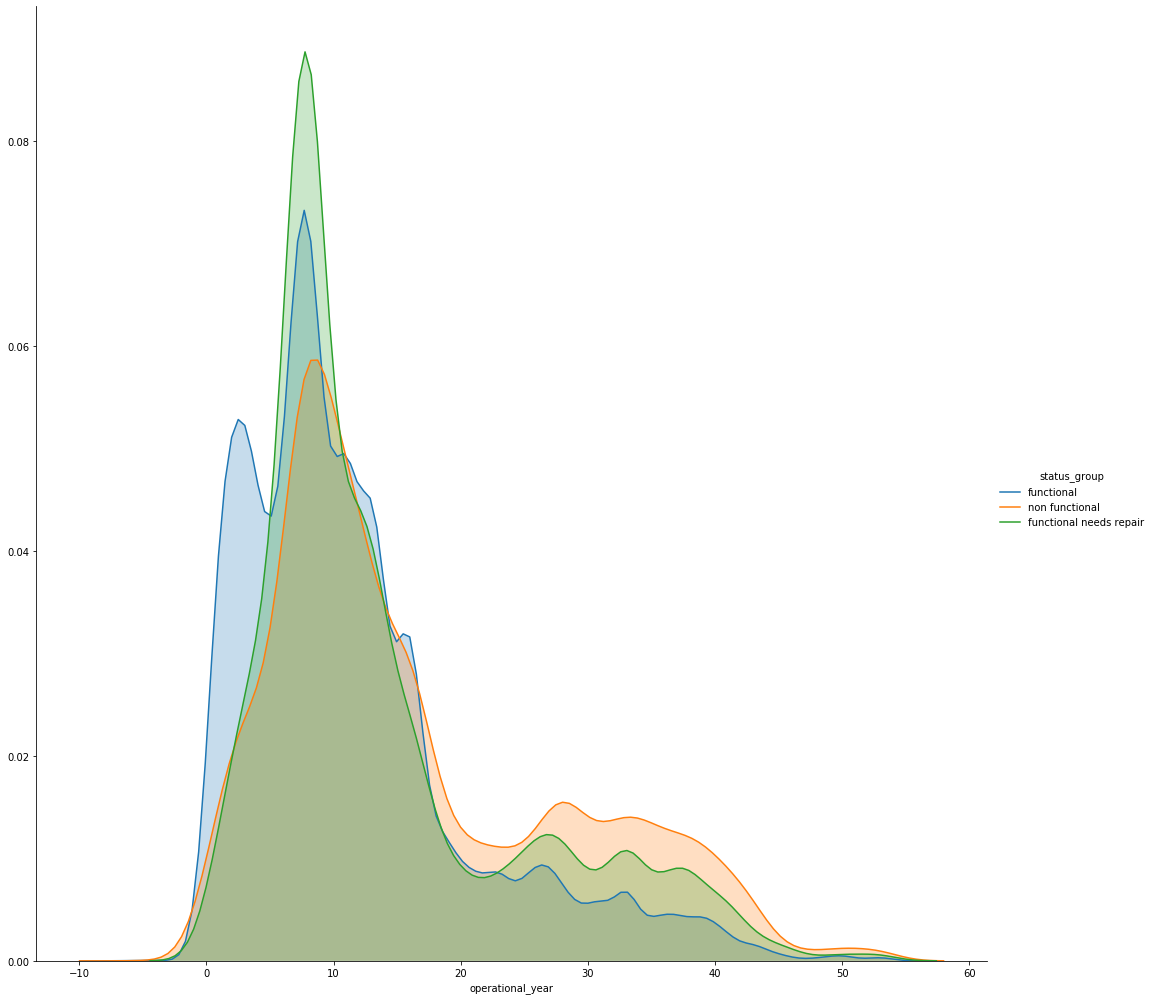

In [50]:
sns.FacetGrid(df, hue='status_group',height=14).map(sns.kdeplot, 'operational_year', shade=True).add_legend()

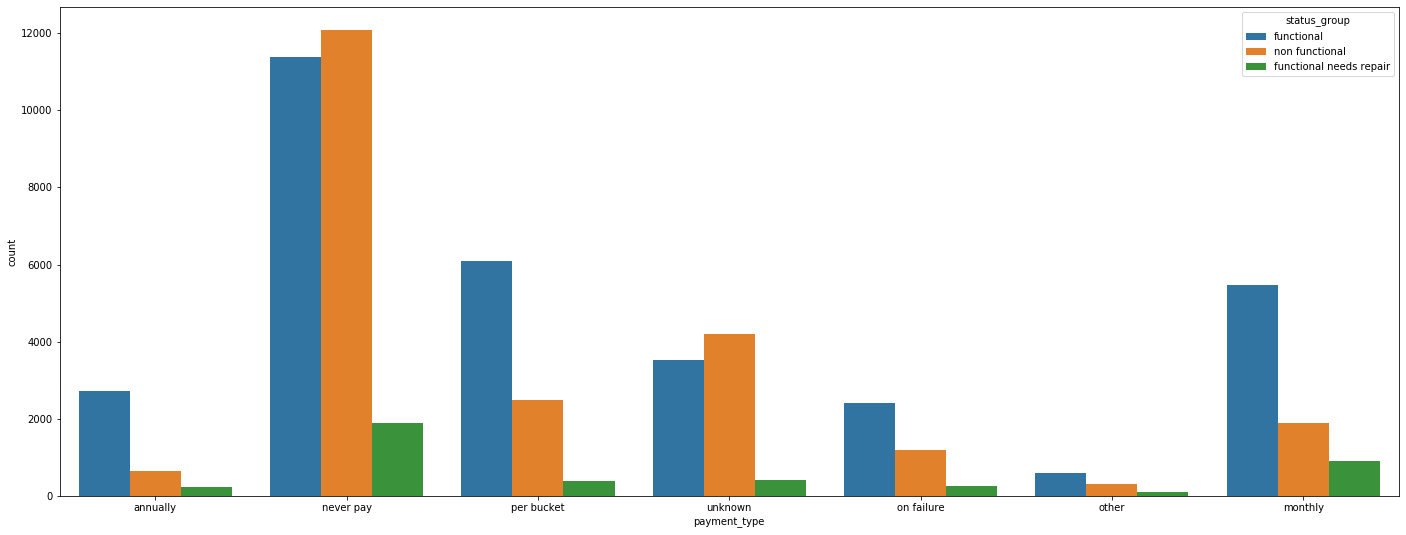

In [51]:
plt.figure(figsize=(24, 9))
sns.countplot(data=df,x='payment_type',hue='status_group')